<a href="https://colab.research.google.com/github/Deepikagh97/Telecom-Churn-Analysis/blob/main/DN_%7C_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Analysis**

In [1]:
# import all librariers
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
sns.set_color_codes = True
%matplotlib inline
from matplotlib import rcParams
import scipy.stats as stats
import copy
import math
import pylab
import warnings
warnings.filterwarnings("ignore")
# figure size in inches
rcParams['figure.figsize'] = 10,8

### **Read and view data**

In [2]:
# Read the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Telecom Churn.csv")

Saving Telecom Churn.csv to Telecom Churn.csv


In [3]:
#Glimpse of Data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
print('The number of rows are',df.shape[0],'\n''The number of columns are',df.shape[1])

The number of rows are 3333 
The number of columns are 20


In [6]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

Space in the columns are replaced by "_" as it might cause some problems in some of the functions while executing.

***Checking information about the dataset***

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
quantitative_columns = df.select_dtypes(include=['int', 'float']).columns


numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the lists of numerical and categorical columns
print(("Numerical Columns:\n", ['bold']), numerical_columns)
print(("\nCategorical Columns:\n", ['bold']), categorical_columns)

('Numerical Columns:\n', ['bold']) ['Account_length', 'Area_code', 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls']
('\nCategorical Columns:\n', ['bold']) ['State', 'International_plan', 'Voice_mail_plan', 'Churn']


- There are no Null values / missing values in the dataset.

- There are 4 categorical columns in the dataset. Column: Area_code is also a categorical variable, it needs to be converted to categorical type.


In [11]:
df['Churn'] = df['Churn'].replace({True: 'True', False: 'False'})

In [12]:
df['Area_code'] = df['Area_code'].astype('object')

***Now, let us check the basic measures of descriptive statistics for the continuous variables***

In [13]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_length,3333.00,NaN,NaN,NaN,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area_code,3333.00,3.00,415.00,1655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International_plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice_mail_plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_vmail_messages,3333.00,NaN,NaN,NaN,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total_day_minutes,3333.00,NaN,NaN,NaN,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total_day_calls,3333.00,NaN,NaN,NaN,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total_day_charge,3333.00,NaN,NaN,NaN,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total_eve_minutes,3333.00,NaN,NaN,NaN,200.98,50.71,0.00,166.60,201.40,235.30,363.70


The average 'Number vmail messages' is 8.10, 'Total day minutes' is 179.78, 'Total day calls' is 100.44, 'Total day charge' is 30.56, 'Total eve minutes' is 200.98, 'Total eve calls' is 100.11, 'Total eve charge' is 17.08, Total night minutes' is 200.87, 'Total night calls' is 100.11, 'Total night charge' is 9.04, Total intl minutes' is 10.24, 'Total intl calls' is 4.48, 'Total intl charge' is 2.76, 'Customer service calls' is 1.56.

Avarage of Total day charge is more than total eve charge, total night charge, and total intl charge.

Around 50% of customers didn't used vmail messages.

There are 51 states.

In [14]:
print(df.isnull().sum())

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64


There are no null values present in the dataset.

In [15]:
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


There are no duplicate values available in the dataset.

In [16]:
#missing values
df.isna().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

There are no missing value in the dataset.

In [17]:
df.nunique()

State                       51
Account_length             212
Area_code                    3
International_plan           2
Voice_mail_plan              2
Number_vmail_messages       46
Total_day_minutes         1667
Total_day_calls            119
Total_day_charge          1667
Total_eve_minutes         1611
Total_eve_calls            123
Total_eve_charge          1440
Total_night_minutes       1591
Total_night_calls          120
Total_night_charge         933
Total_intl_minutes         162
Total_intl_calls            21
Total_intl_charge          162
Customer_service_calls      10
Churn                        2
dtype: int64

In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATE :  51
CA     34
IA     44
PA     45
LA     51
AK     52
TN     53
HI     53
DC     54
GA     54
AR     55
NH     56
IL     58
KY     59
SC     60
SD     60
DE     61
OK     61
NE     61
ND     62
ME     62
NM     62
MO     63
FL     63
AZ     64
MS     65
MA     65
RI     65
WA     66
NV     66
CO     66
MT     68
NJ     68
NC     68
KS     70
MD     70
IN     71
UT     72
TX     72
MI     73
ID     73
VT     73
CT     74
VA     77
WY     77
OR     78
OH     78
WI     78
AL     80
NY     83
MN     84
WV    106
Name: State, dtype: int64


AREA_CODE :  3
408     838
510     840
415    1655
Name: Area_code, dtype: int64


INTERNATIONAL_PLAN :  2
Yes     323
No     3010
Name: International_plan, dtype: int64


VOICE_MAIL_PLAN :  2
Yes     922
No     2411
Name: Voice_mail_plan, dtype: int64


CHURN :  2
True      483
False    2850
Name: Churn, dtype: int64




In almost every states the customers are equally distributed, only in 'WV' state customers are more. The dataset provided has 3 unique area, out of which 415 area has more customers. Less number of customers have taken international and voice mail plan.

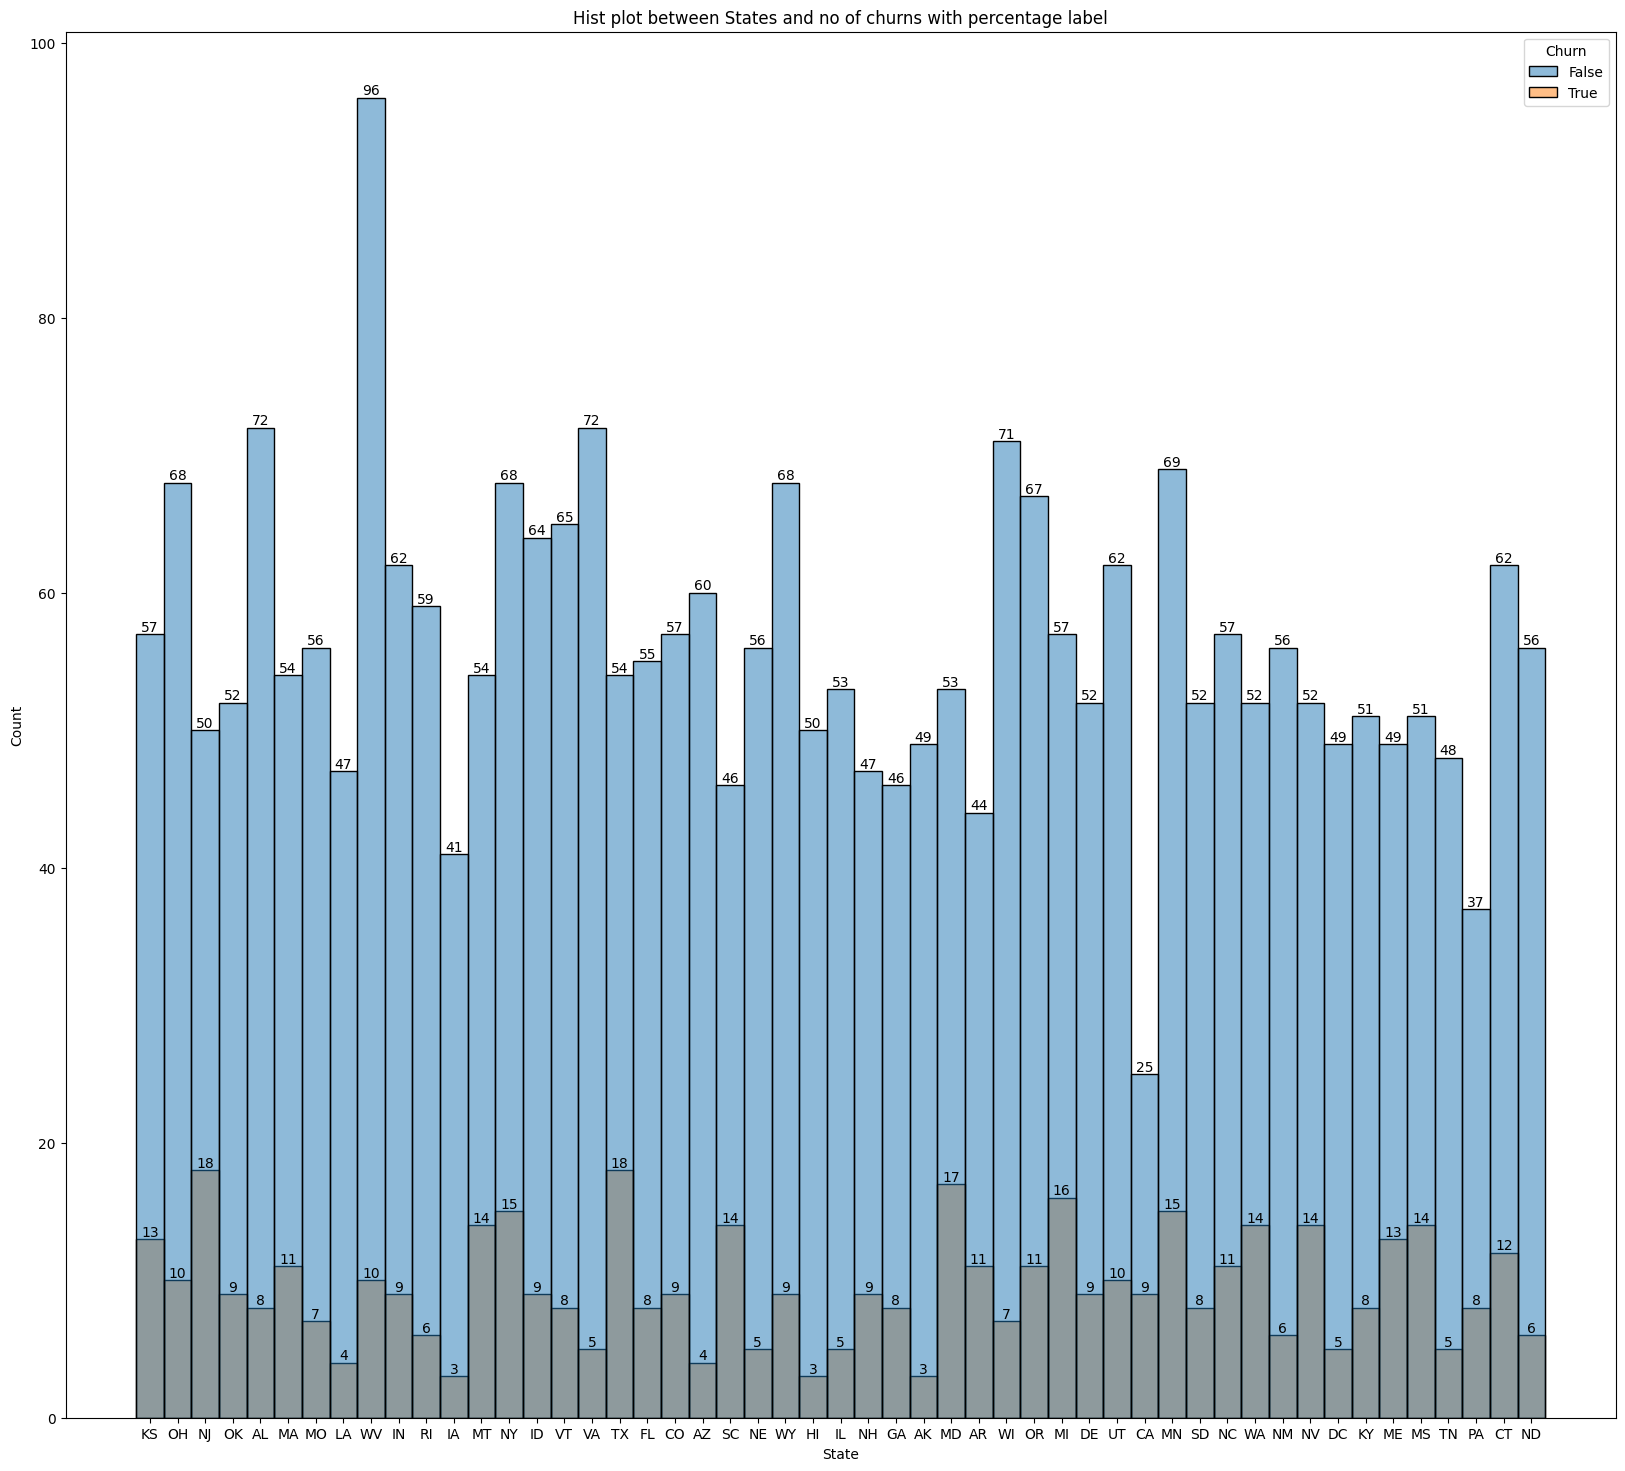

In [19]:
plt.figure(figsize=(20,18))
ax = sns.histplot(data=df, x="State", hue="Churn")
plt.title("Hist plot between States and no of churns with percentage label")
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [20]:
# Group by state and churn
grouped = df.groupby(["State", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with state as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="State", columns="Churn", values="count")

table["State"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each state
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True State  False_%  True_%
31        50    18    NJ     0.74    0.26
4         25     9    CA     0.74    0.26
43        54    18    TX     0.75    0.25
20        53    17    MD     0.76    0.24
40        46    14    SC     0.77    0.23
22        57    16    MI     0.78    0.22
25        51    14    MS     0.78    0.22
33        52    14    NV     0.79    0.21
47        52    14    WA     0.79    0.21
21        49    13    ME     0.79    0.21
26        54    14    MT     0.79    0.21
2         44    11    AR     0.80    0.20
16        57    13    KS     0.81    0.19
34        68    15    NY     0.82    0.18
23        69    15    MN     0.82    0.18
38        37     8    PA     0.82    0.18
19        54    11    MA     0.83    0.17
6         62    12    CT     0.84    0.16
27        57    11    NC     0.84    0.16
30        47     9    NH     0.84    0.16
10        46     8    GA     0.85    0.15
8         52     9    DE     0.85    0.15
36        52     9    OK     0.85 

State **'NJ'**, **'CA'** has highest churt rate of 26% and State **'HI', 'AK', 'AZ', 'VA'** **bold text** has lowest churn rate of 0.06%.

In [21]:
#binning the account_length variable in to 4 bins
df['AC_Len_grp'] = pd.cut(df['Account_length'], 4, labels = ['0','60', '150', '250'])

display("AC_Len_grp:", df.AC_Len_grp.unique())

display(df['AC_Len_grp'])

'AC_Len_grp:'

['150', '60', '0', '250']
Categories (4, object): ['0' < '60' < '150' < '250']

0       150
1        60
2       150
3        60
4        60
       ... 
3328    250
3329     60
3330      0
3331    250
3332     60
Name: AC_Len_grp, Length: 3333, dtype: category
Categories (4, object): ['0' < '60' < '150' < '250']

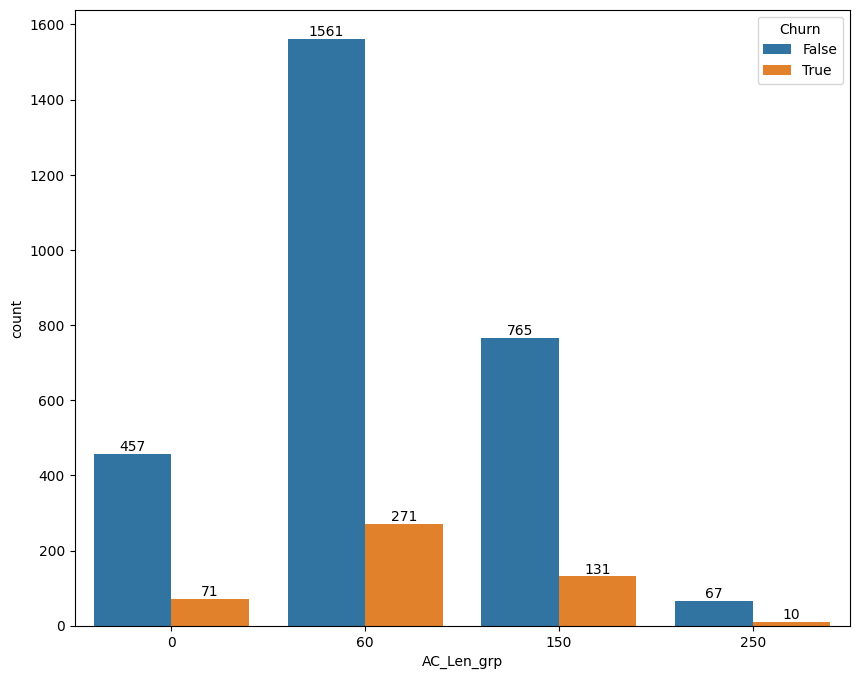

In [22]:
ax = sns.countplot(df, x = 'AC_Len_grp', hue= 'Churn');
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [23]:
# Group by AC_Len_grp and churn
grouped = df.groupby(["AC_Len_grp", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with AC_Len_grp as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="AC_Len_grp", columns="Churn", values="count")

table["AC_Len_grp"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each AC_Len_grp
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True AC_Len_grp  False_%  True_%
1       1561   271         60     0.85    0.15
2        765   131        150     0.85    0.15
0        457    71          0     0.87    0.13
3         67    10        250     0.87    0.13


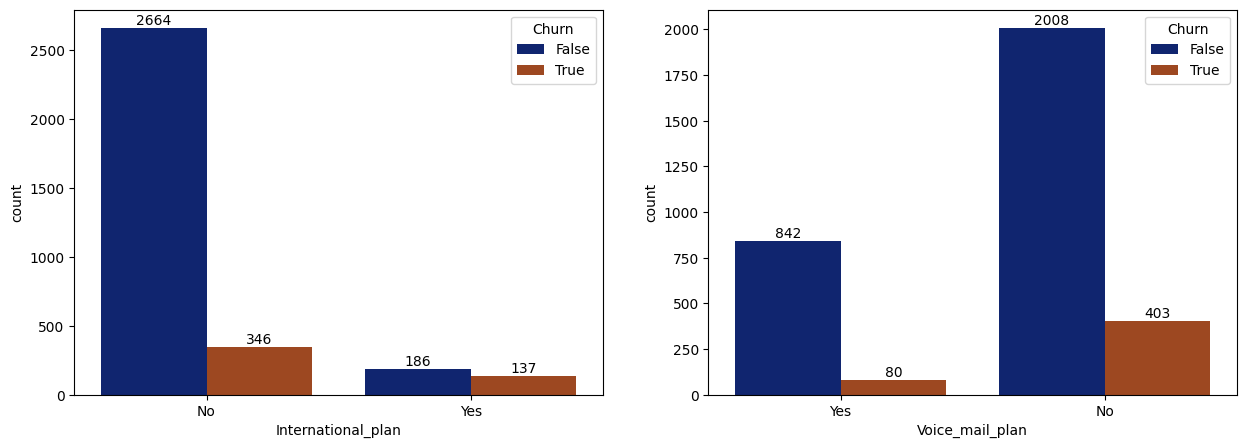

In [24]:
_, axes = plt.subplots(nrows = 1 , ncols = 2, figsize = (15 , 5))
ax= sns.countplot(x= 'International_plan' , data = df , ax = axes[0], palette= 'dark', hue= 'Churn')
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');

ax= sns.countplot(x= 'Voice_mail_plan' , data = df , ax = axes[1], palette= 'dark', hue= 'Churn')
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [25]:
# Group by Voice_mail_plan and churn
grouped = df.groupby(["Voice_mail_plan", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with Voice_mail_plan as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Voice_mail_plan", columns="Churn", values="count")

table["Voice_mail_plan"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True Voice_mail_plan  False_%  True_%
0       2008   403              No     0.83    0.17
1        842    80             Yes     0.91    0.09


In [26]:
# Group by International_plan and churn
grouped = df.groupby(["International_plan", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with International_plan as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="International_plan", columns="Churn", values="count")

table["International_plan"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn  False  True International_plan  False_%  True_%
1        186   137                Yes     0.58    0.42
0       2664   346                 No     0.89    0.11


42% of the Customers with International_plan have churned.

However only 17% of Customers with a Voice_mail_plan have churned.

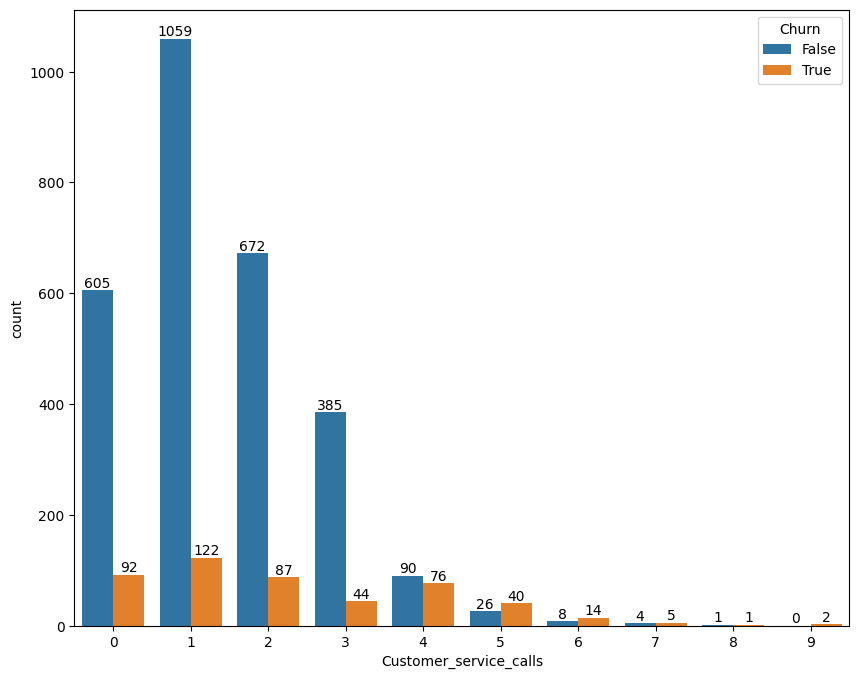

In [27]:
ax = sns.countplot(df, x = 'Customer_service_calls', hue= 'Churn');
ax.bar_label(ax.containers[0], fmt = '%d');
ax.bar_label(ax.containers[1], fmt = '%d');
plt.show()

In [28]:
# Group by Customer_service_call and churn
grouped = df.groupby(["Customer_service_calls", "Churn"])

# Get the count of each group
counts = grouped.size().reset_index() # Remove the name argument

# Rename the column with the counts
counts = counts.rename(columns={0: "count"}) # Use rename method

# Reshape into a table with state as rows, churn as columns, and count as values
table = pd.pivot_table(counts, index="Customer_service_calls", columns="Churn", values="count")

table["Customer_service_calls"]= table.index
# Reset the index for each group
table = table.apply(lambda x: x.reset_index(drop=True))

# Calculate the percentage of churn by each state
table["False_%"] = table["False"]/(table["False"]+table["True"])
table["True_%"] = table["True"]/(table["False"]+table["True"])

# Sort by Yes column in descending order
table = table.sort_values("True_%", ascending=False)

# Print the result
print(table)

Churn   False   True  Customer_service_calls  False_%  True_%
6        8.00  14.00                       6     0.36    0.64
5       26.00  40.00                       5     0.39    0.61
7        4.00   5.00                       7     0.44    0.56
8        1.00   1.00                       8     0.50    0.50
4       90.00  76.00                       4     0.54    0.46
0      605.00  92.00                       0     0.87    0.13
2      672.00  87.00                       2     0.89    0.11
1     1059.00 122.00                       1     0.90    0.10
3      385.00  44.00                       3     0.90    0.10
9         NaN   2.00                       9      NaN     NaN


The customer who made more than 5 customer service calls has more then 50% churn rate.

In [29]:
df["Total_charge"] =df["Total_day_charge"] + df["Total_eve_charge"] + df["Total_night_charge"] + df["Total_intl_charge"]

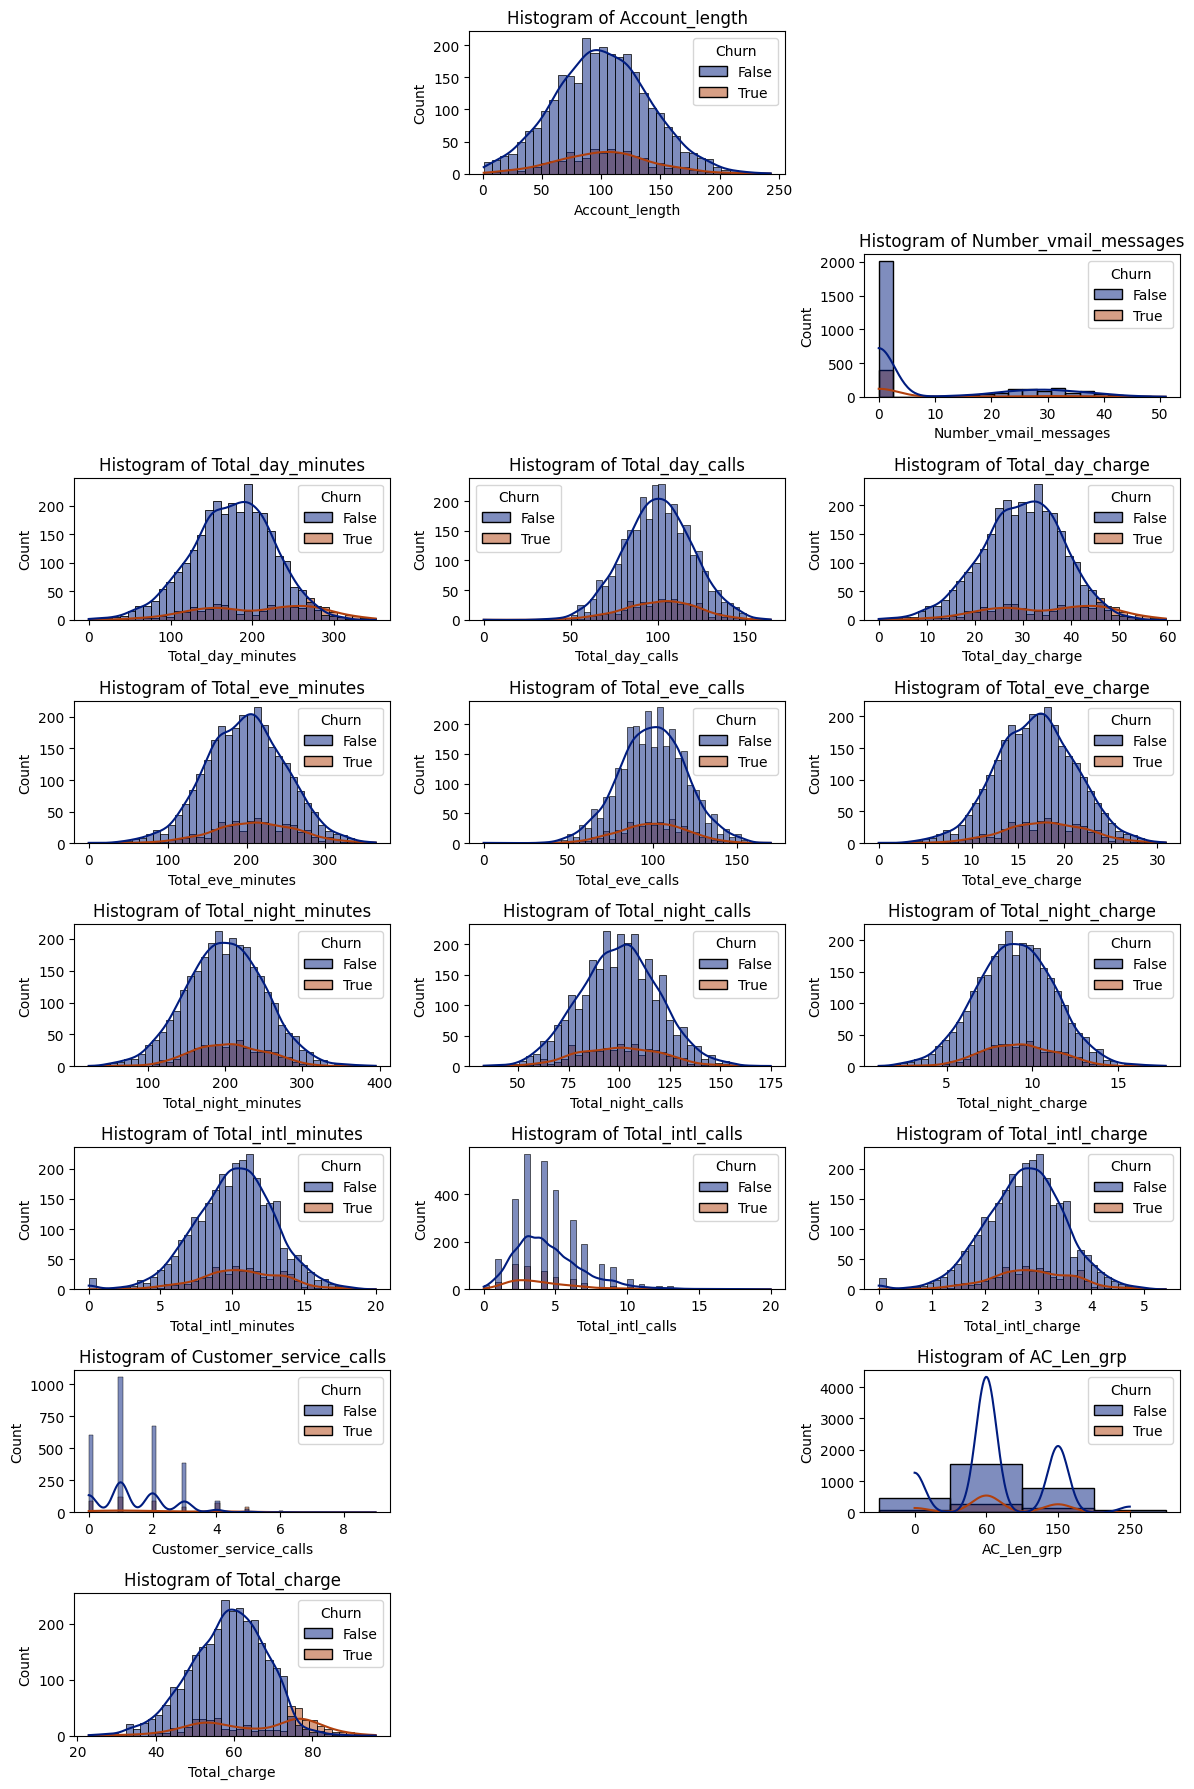

In [30]:
plt.figure(figsize = (12,18))
feature_list = df.columns
for i in range(len(feature_list)):
    if df[feature_list[i]].dtype !='object':
        plt.subplot(8, 3, i + 1)
        sns.histplot(x = df[feature_list[i]], data = df, kde = True, hue = 'Churn', palette = "dark")
        plt.title('Histogram of {}'.format(feature_list[i]))
        plt.tight_layout()

Text(0.5, 1.0, 'Figure:Boxplot of few important features')

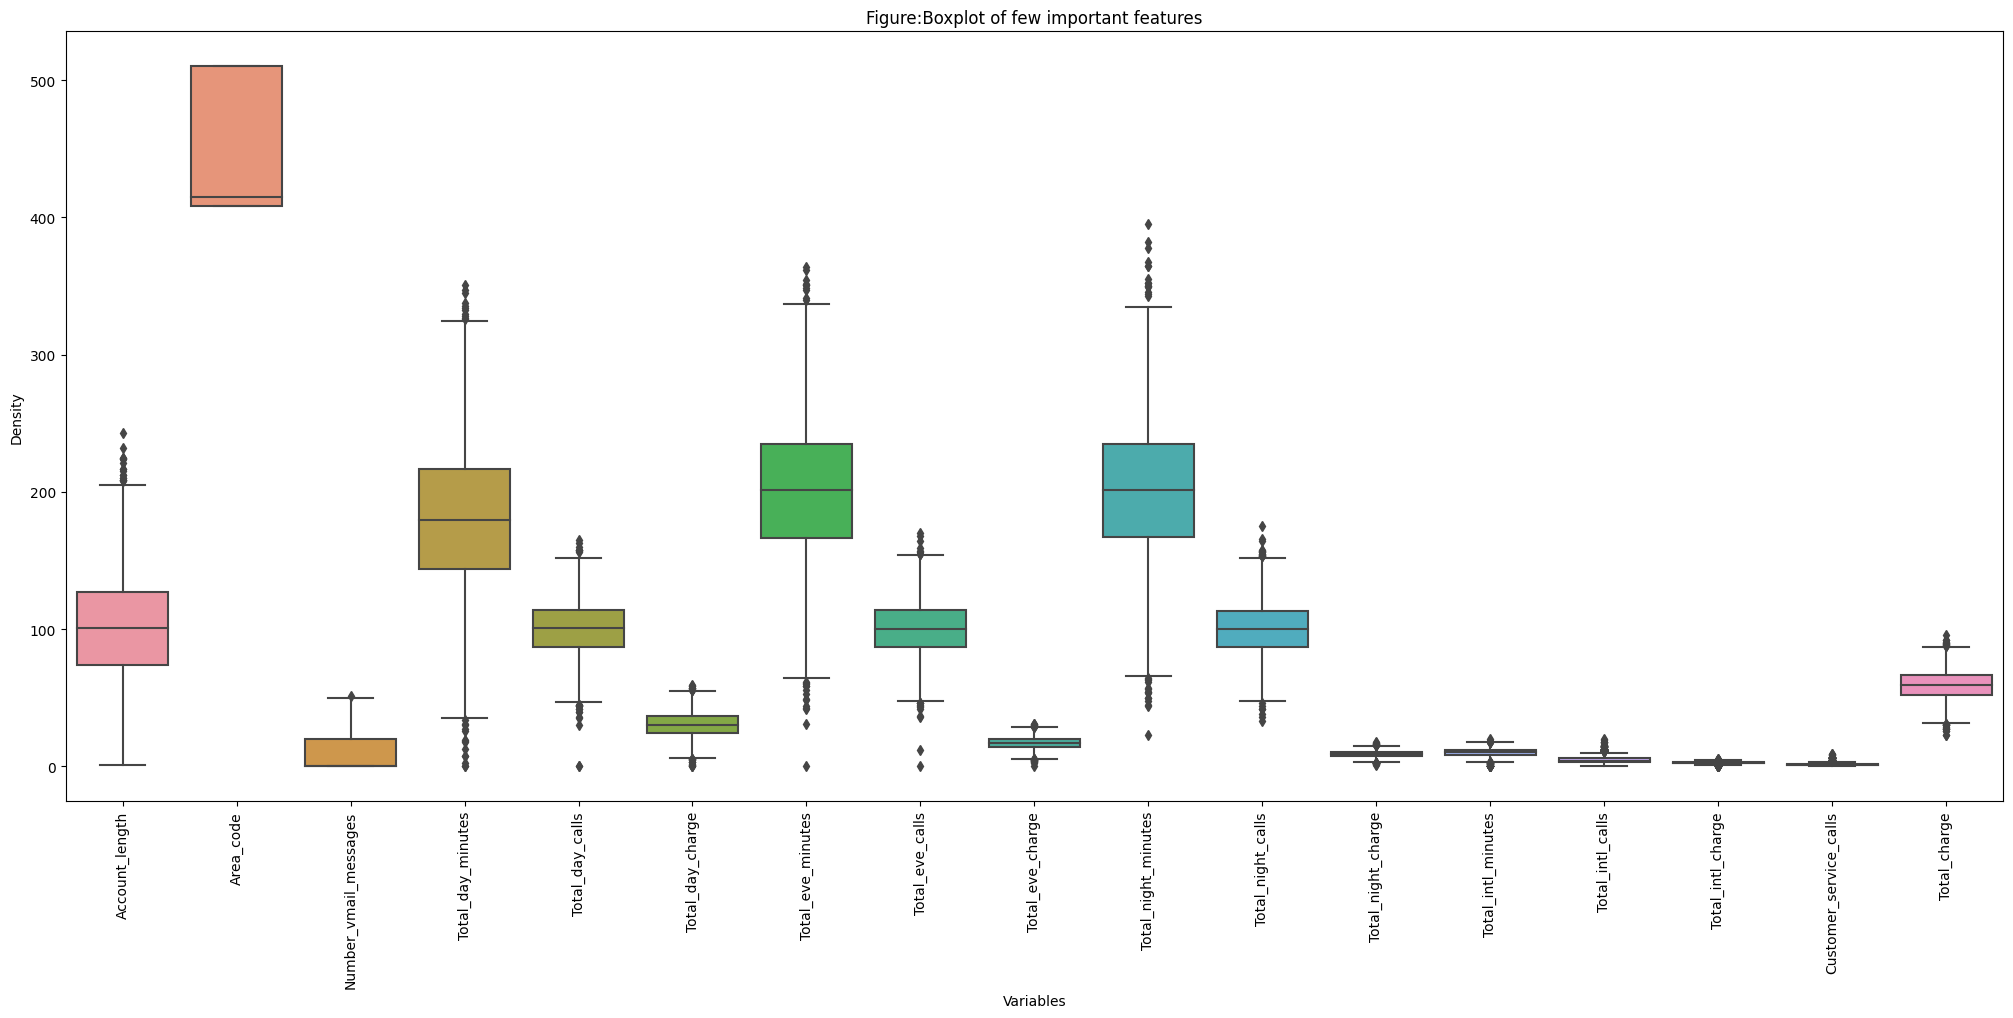

In [33]:
# Lets check if there are any outliers in the data set
plt.figure(figsize=(25,10))
sns.boxplot(data=df)
plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Density")
plt.title('Figure:Boxplot of few important features')